# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D, LSTM, Dense, Dropout, Flatten,Bidirectional
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, Dropout, Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import TimeSeriesSplit

In [4]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
print(f"df_train shape{df_train.shape}")
print(f"df_test shape{df_test.shape}")

df_train shape(369289, 36)
df_test shape(41033, 36)


In [5]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,no stress


In [6]:
df_train['condition'].unique()

array(['no stress', 'interruption', 'time pressure'], dtype=object)

In [7]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369289 entries, 0 to 369288
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MEAN_RR            369289 non-null  float64
 1   MEDIAN_RR          369289 non-null  float64
 2   SDRR               369289 non-null  float64
 3   RMSSD              369289 non-null  float64
 4   SDSD               369289 non-null  float64
 5   SDRR_RMSSD         369289 non-null  float64
 6   HR                 369289 non-null  float64
 7   pNN25              369289 non-null  float64
 8   pNN50              369289 non-null  float64
 9   SD1                369289 non-null  float64
 10  SD2                369289 non-null  float64
 11  KURT               369289 non-null  float64
 12  SKEW               369289 non-null  float64
 13  MEAN_REL_RR        369289 non-null  float64
 14  MEDIAN_REL_RR      369289 non-null  float64
 15  SDRR_REL_RR        369289 non-null  float64
 16  RM

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41033 entries, 0 to 41032
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEAN_RR            41033 non-null  float64
 1   MEDIAN_RR          41033 non-null  float64
 2   SDRR               41033 non-null  float64
 3   RMSSD              41033 non-null  float64
 4   SDSD               41033 non-null  float64
 5   SDRR_RMSSD         41033 non-null  float64
 6   HR                 41033 non-null  float64
 7   pNN25              41033 non-null  float64
 8   pNN50              41033 non-null  float64
 9   SD1                41033 non-null  float64
 10  SD2                41033 non-null  float64
 11  KURT               41033 non-null  float64
 12  SKEW               41033 non-null  float64
 13  MEAN_REL_RR        41033 non-null  float64
 14  MEDIAN_REL_RR      41033 non-null  float64
 15  SDRR_REL_RR        41033 non-null  float64
 16  RMSSD_REL_RR       410

None

In [8]:
df_train['condition'] = df_train['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})
df_test['condition'] = df_test['condition'].map({'no stress':0, 'interruption':1, 'time pressure':2})

In [9]:
df_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [10]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values

In [11]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [12]:
print(X.shape)

(369289, 35, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1),padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=1))
model.add(Flatten())
# # LSTM layers
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dropout(0.3))

# Fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('swell_ablation.keras', monitor='val_accuracy', save_best_only=True, mode='max')


In [26]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping, model_checkpoint])

Epoch 1/30
2020/2020 [==============================] - 7s 3ms/step - loss: 1.2360 - accuracy: 0.5442 - val_loss: 0.9210 - val_accuracy: 0.5537
Epoch 2/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.9599 - accuracy: 0.5522 - val_loss: 0.9913 - val_accuracy: 0.5418
Epoch 3/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.9807 - accuracy: 0.5458 - val_loss: 0.9836 - val_accuracy: 0.5470
Epoch 4/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.9361 - accuracy: 0.5652 - val_loss: 0.8822 - val_accuracy: 0.5757
Epoch 5/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.8900 - accuracy: 0.5820 - val_loss: 0.8181 - val_accuracy: 0.6035
Epoch 6/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.8627 - accuracy: 0.5934 - val_loss: 0.7778 - val_accuracy: 0.6228
Epoch 7/30
2020/2020 [==============================] - 6s 3ms/step - loss: 0.8296 - accuracy: 0.6047 - val_loss: 0.7295 - val_accuracy:

In [27]:
X_test = df_test.iloc[:, :-1].values
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) 
y_test = df_test.iloc[:, -1].values
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

1283/1283 [==============================] - 3s 2ms/step - loss: 0.2054 - accuracy: 0.8988
Test accuracy: 0.8988131284713745
Test loss: 0.20544154942035675


In [28]:
from sklearn.metrics import classification_report
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")



1283/1283 [==============================] - 2s 1ms/step
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     22158
           1       0.97      0.73      0.83     11782
           2       0.97      0.89      0.93      7093

    accuracy                           0.90     41033
   macro avg       0.93      0.87      0.89     41033
weighted avg       0.91      0.90      0.90     41033



1283/1283 [==============================] - 2s 1ms/step


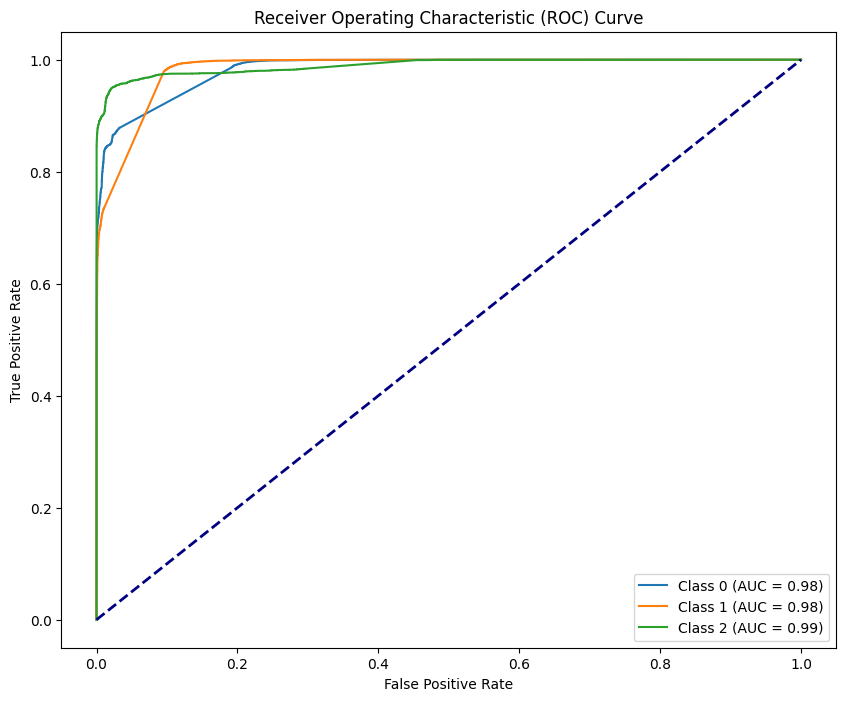

ROC AUC Score: {:.2f}


In [29]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = model.predict(X_test)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score: {:.2f}")

1283/1283 [==============================] - 2s 1ms/step


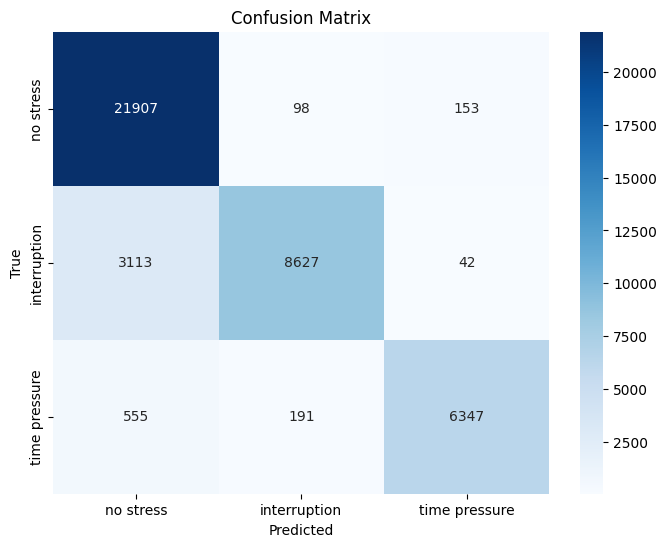

In [30]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
plot_confusion_matrix(y_test, y_pred, classes=['no stress', 'interruption', 'time pressure'])

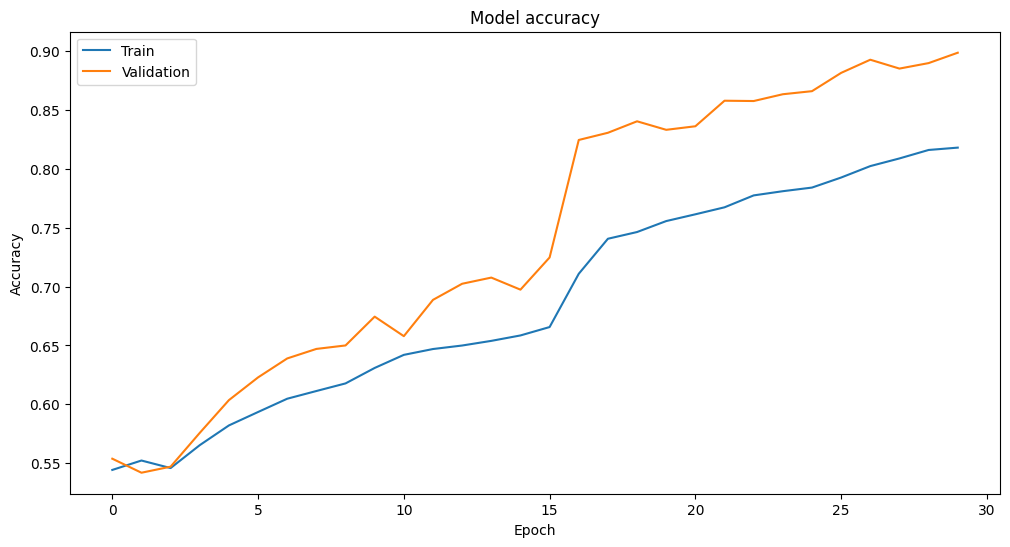

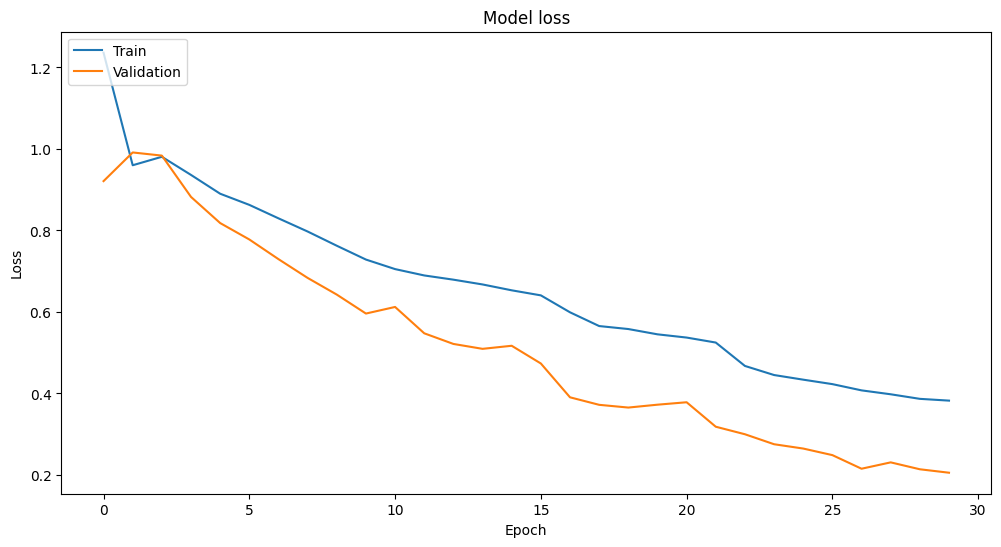

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()